In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
data=pd.read_csv("Student_Marks.csv") 
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


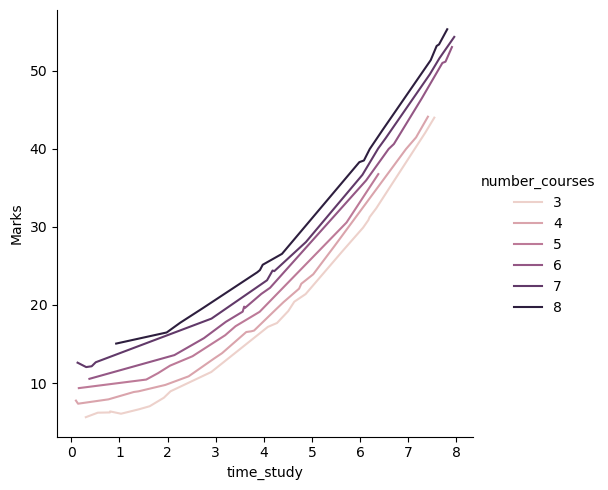

In [5]:
sns.relplot(x="time_study",y="Marks",hue="number_courses",kind="line",data=data)
plt.show()

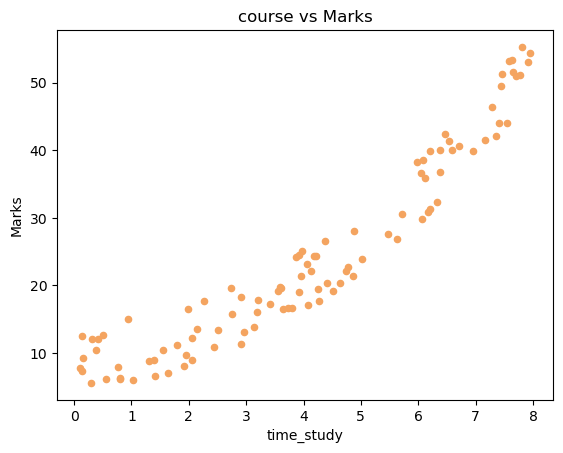

In [6]:
data.plot.scatter(x = 'time_study', y = 'Marks',
                  color = 'sandybrown', title = 'course vs Marks')
plt.show()

In [7]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


In [8]:
X=data[["number_courses","time_study"]]

In [9]:
Y=data["Marks"]

In [10]:
model=LinearRegression()

In [11]:
model.fit(X,Y)

LinearRegression()

In [12]:
model.coef_

array([1.86405074, 5.39917879])

In [13]:
model.intercept_

-7.456346231178351

In [14]:
model.score(X,Y)*100

94.03656320238896

## Split the data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [17]:
model.fit(X_test,Y_test)

LinearRegression()

In [18]:
model.score(X_test,Y_test)*100

94.24118435925932

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
model.score(X_train,Y_train)*100

94.20282310980231

In [21]:
y_pred=model.predict(X_test)              ##predict y value

In [22]:
y_pred

array([20.32195356, 37.69577312, 17.066387  , 10.70102551, 49.28946121,
       28.60340626, 28.83770455, 16.16476243, 22.51879015, 23.24872007,
       36.56252959, 42.97269027, 11.85693658, 27.29199739, 21.42980994,
       40.3488008 , 32.38481439, 24.46781093,  3.75744056, 41.33627269,
       43.41433239, 26.39144455, 38.90460195, 15.65833291,  8.56250564,
       37.1677478 ,  0.6697773 , -0.19459049, 25.40883574, 29.50771016])

In [23]:
new_df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [24]:
new_df

,Actual,Predicted
70,16.606,20.321954
74,39.952,37.695773
2,13.811,17.066387
44,9.742,10.701026
56,53.359,49.289461
48,26.882,28.603406
12,24.318,28.837705
36,13.119,16.164762
0,19.202,22.518790
49,19.106,23.248720


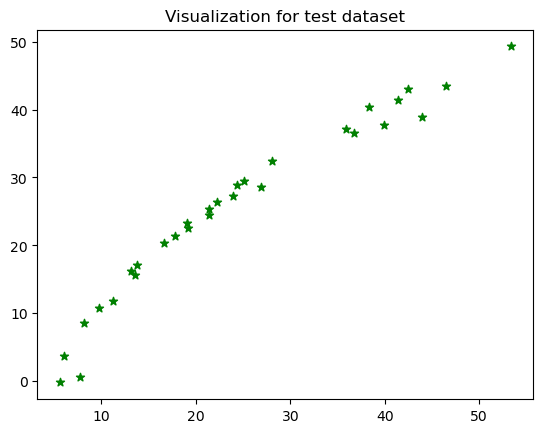

In [38]:
plt.scatter(Y_test,y_pred,color="green",marker="*")

plt.title("Visualization for test dataset")
plt.show()

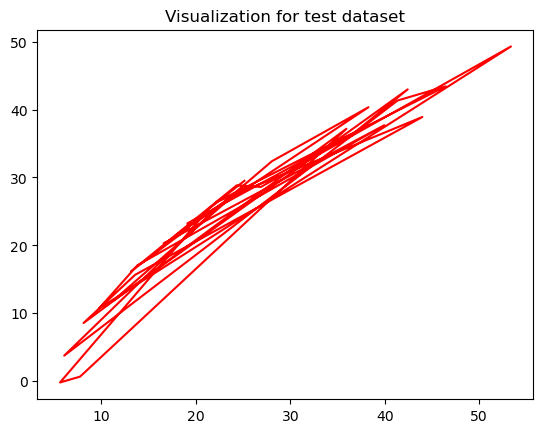

In [46]:
plt.plot(Y_test,y_pred,color="red")
plt.title("Visualization for test dataset")
plt.show()

## Accuracy

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(Y_test, y_pred)*100

93.3255385177736

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(Y_test, y_pred)

2.949919610027022

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
import math

In [33]:
mean_squared_error(Y_test, y_pred)

11.615234124881159